In [2]:
from __future__ import division
import numpy as np
import scipy
import skimage
import matplotlib.pyplot as plt
%matplotlib inline
#%matplotlib qt
from skimage import data, io, filters
from math import sqrt
import itertools
from scipy import signal
import pywt
import time
from IPython import display

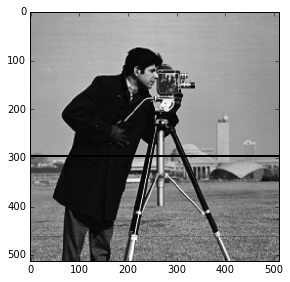

In [14]:
im = data.camera()
im[295:300] = 0
#noisy_image = skimage.util.random_noise(im, mode='gaussian', seed=None, clip=True)
io.imshow(im)

mask = np.ones((512,512))
mask[290:300] = 0

In [ ]:
# f= Au + n
# A is the corruption matrix
# x is approximation+details
#del square of F(x) is defined as: WA^(T)(AW^T x - f)

def wavelet_to_numpy(pywavelet_wavelet):
    approximation_result = []
    details_result = []
    wavelet_levels = len(pywavelet_wavelet)
    
    for x in range(wavelet_levels):
        approximation_result.append(pywavelet_wavelet[x][0])
        details_result.append(pywavelet_wavelet[x][1])
    
    return np.array(approximation_result), np.array(details_result)


def numpy_to_wavelet(approx, details):
    ans_list = []
    for x, y in zip(approx, details):
        ans_list.append((x, (y)))
        
    return ans_list


def apg(im, A, lam, wavelet_name, lvl, iterations):
    
    x_naught = pywt.swt2(im, wavelet_name, level=lvl)
    x_naught_approx, x_naught_details = wavelet_to_numpy(x_naught)
    x = [(x_naught_approx, x_naught_details), (x_naught_approx, x_naught_details)]
    t = [0, 1]
    
    for iteration in np.arange(iterations):
        y_approx = x[1][0] + (((t[0]-1)/(t[1]))*x[1][0]-((t[0]-1)/(t[1]))*x[0][0] )
        y_details = x[1][1] + (((t[0]-1)/(t[1]))*x[1][1]-((t[0]-1)/(t[1]))*x[0][1] )
        
        subtractand =  pywt.swt2((np.multiply(A.T, (np.multiply(A, np.array(pywt.iswt2(numpy_to_wavelet(y_approx, y_details), wavelet_name)) ) - im))), \
                          wavelet_name, level=lvl)
        
        subtractand_approx, subtractand_details = wavelet_to_numpy(subtractand)
        
        g = (y_approx - subtractand_approx, y_details - subtractand_details)
         
        x[0] = x[1]
        pholder_1, pholder_2 = (pywt.threshold(g[0], lam, 'soft')), (pywt.threshold(g[1], lam, 'soft')) #this is in numpy
        x[1] =  (pholder_1, pholder_2)
        
        t[0] = t[1]
        t[1] = (1 + (1+(4*(t[0])**2))**(0.5))/2
        
        plt.imshow( pywt.iswt2(numpy_to_wavelet(pholder_1, pholder_2), wavelet_name) , cmap = 'Greys_r')
        display.clear_output(wait=True)
        display.display(plt.gcf())
        time.sleep(1.0)

In [30]:
# f= Au + n
# A is the corruption matrix
# x is approximation+details
#del square of F(x) is defined as: WA^(T)(AW^T x - f)

def wavelet_to_numpy(pywavelet_wavelet):
    approximation_result = []
    details_result = []
    wavelet_levels = len(pywavelet_wavelet)
    
    for x in range(wavelet_levels):
        approximation_result.append(pywavelet_wavelet[x][0])
        details_result.append(pywavelet_wavelet[x][1])
    
    return np.array(approximation_result), np.array(details_result)


def numpy_to_wavelet(approx, details):
    ans_list = []
    for x, y in zip(approx, details):
        ans_list.append((x, (y)))
        
    return ans_list


def apg(im, A, lam, wavelet_name, lvl, iterations):
    
    x_naught = pywt.wavedec2(im, wavelet_name, level=lvl)
    x_naught_approx, x_naught_details = wavelet_to_numpy(x_naught)
    x = [(x_naught_approx, x_naught_details), (x_naught_approx, x_naught_details)]
    t = [0, 1]
    
    for iteration in np.arange(iterations):
        y_approx = x[1][0] + (((t[0]-1)/(t[1]))*x[1][0]-((t[0]-1)/(t[1]))*x[0][0] )
        y_details = x[1][1] + (((t[0]-1)/(t[1]))*x[1][1]-((t[0]-1)/(t[1]))*x[0][1] )
        
        subtractand =  pywt.wavedec2((np.multiply(A.T, (np.multiply(A, np.array(pywt.waverec2(numpy_to_wavelet(y_approx, y_details), wavelet_name)) ) - im))), \
                          wavelet_name, level=lvl)
        
        
        pywt.wavedec2(data, wavelet, mode='symmetric', level=None, axes=(-2, -1))¶

        
        subtractand_approx, subtractand_details = wavelet_to_numpy(subtractand)
        
        g = (y_approx - subtractand_approx, y_details - subtractand_details)
         
        x[0] = x[1]
        pholder_1, pholder_2 = (pywt.threshold(g[0], lam, 'soft')), (pywt.threshold(g[1], lam, 'soft')) #this is in numpy
        x[1] =  (pholder_1, pholder_2)
        
        t[0] = t[1]
        t[1] = (1 + (1+(4*(t[0])**2))**(0.5))/2
        
        plt.imshow( pywt.waverec2(numpy_to_wavelet(pholder_1, pholder_2), wavelet_name) , cmap = 'Greys_r')
        display.clear_output(wait=True)
        display.display(plt.gcf())
        time.sleep(1.0)

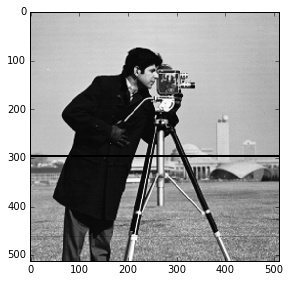

In [15]:
io.imshow(im, cmap = 'Greys_r')

In [31]:
apg(im, mask, 0.1, 'db2', 3, 1000)

ValueError: need more than 2 values to unpack

In [36]:
transform = pywt.wavedec2(data.camera(), 'db2')
recovery = pywt.waverec2(transform, 'db2')

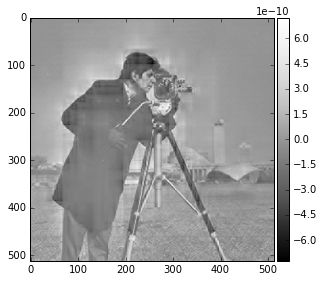

In [37]:
io.imshow(data.camera() - recovery, cmap = 'Greys_r')